1. 請說明此研究之樣本結構。(建議可採用相對次數分析表或視覺化圖形呈現說明)

2. 請透過蒐集之樣本資料,分析該國中有利用 LINE 進行班級經營的學生目前之學習動機及
學生學習成效狀況。(建議可採用平均數及標準差或視覺化圖形呈現說明)

3. 請分析學生的性別、年級以及使用 Line 與老師互動的程度是否會影響其學習動機及學習成效。(建議可採用獨立樣本 t 檢定法或 one-way ANOVA)

4. 請分析學習動機與學習成效的關係。(建議可採用相關係數或線性迴歸分析模式)

5. 請以上述結果,給與中學教師在進行班級經營之建議

#資料

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [ ]:
data=pd.read_excel('line application.xlsx')

In [ ]:
data['self-directed learning']=(data['M11']+data['M12']+data['M13']+data['M14'])/4 #自主學習
data['external affirmation']=(data['M21']+data['M22']+data['M23']+data['M24']+data['M25'])/5 #外在肯定
data['learning outcome']=(data['E11']+data['E12']+data['E13']+data['E14']+data['E15'])/5 #學習效能
data['social orientation']=(data['E21']+data['E22']+data['E24']+data['E25'])/4 #社會定位
data['learning motivation']=data['self-directed learning']+data['external affirmation'] #學習動機=自主學習+外在肯定
data['learning effect']=data['learning outcome']+data['social orientation'] #學習成效=學習效能+社會定位

In [ ]:
data.head()

,性別,年級,是否使用line,M11,M12,M13,M14,M21,M22,M23,...,E21,E22,E24,E25,self-directed learning,external affirmation,learning outcome,social orientation,learning motivation,learning effect
0,2,1,1,5,5,5,5,5,5,4,...,5,3,4,5,5.00,4.80,4.00,4.25,9.80,8.25
1,1,1,0,5,5,5,2,3,4,3,...,1,2,2,2,4.25,3.00,3.20,1.75,7.25,4.95
2,2,1,0,3,2,3,1,3,3,1,...,5,5,4,5,2.25,3.20,1.40,4.75,5.45,6.15
3,2,1,1,3,4,4,3,3,3,2,...,4,4,3,4,3.50,2.80,3.00,3.75,6.30,6.75
4,2,1,0,4,4,5,2,3,4,4,...,1,1,2,3,3.75,3.60,2.20,1.75,7.35,3.95


#1.請說明此研究之樣本結構。(建議可採用相對次數分析表或視覺化圖形呈現說明)

類別:性別、年級、是否使用line

剩下為屬量

In [ ]:
f=data.groupby('性別')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_性別'])
f=data.groupby('性別')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=["Percentage_性別"])
flist.merge(plist,on = '性別')

,Frequence_性別,Percentage_性別
性別,,
1,124,0.49
2,129,0.51


In [ ]:
f=data.groupby('年級')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_年級'])
f=data.groupby('年級')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=["Percentage_年級"])
flist.merge(plist,on = '年級')

,Frequence_年級,Percentage_年級
年級,,
1,80,0.32
2,71,0.28
3,102,0.40


In [ ]:
f=data.groupby('是否使用line')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_是否使用line'])
f=data.groupby('是否使用line')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=["Percentage_是否使用line"])
flist.merge(plist,on = '是否使用line')

,Frequence_是否使用line,Percentage_是否使用line
是否使用line,,
0,112,0.44
1,141,0.56


In [ ]:
data.describe().iloc[: , -6:-2]

,self-directed learning,external affirmation,learning outcome,social orientation
count,253.00,253.00,253.00,253.00
mean,3.54,3.62,3.08,3.58
std,0.80,0.83,0.79,0.97
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,2.60,3.00
50%,3.50,3.60,3.00,3.75
75%,4.00,4.20,3.60,4.25
max,5.00,5.00,5.00,5.00


#2.請透過蒐集之樣本資料,分析該國中有利用 LINE 進行班級經營的學生目前之學習動機及 學生學習成效狀況。(建議可採用平均數及標準差或視覺化圖形呈現說明)

In [ ]:
data.groupby('是否使用line').mean()[['learning motivation','learning effect']]

,learning motivation,learning effect
是否使用line,,
0,6.86,6.38
1,7.40,6.89


In [ ]:
data.groupby('是否使用line').std()[['learning motivation','learning effect']]

,learning motivation,learning effect
是否使用line,,
0,1.46,1.47
1,1.43,1.60


#3.請分析學生的性別、年級以及使用 Line 與老師互動的程度是否會影響其學習動機及學習成效。(建議可採用獨立樣本 t 檢定法或 one-way ANOVA)

In [ ]:
b=['learning motivation','learning effect']
name=[]
alist=[]
pvlist=[]
for i in range(len(b)):
  (a,pv)=stats.ttest_ind(data[b[i]][data['性別']==1],data[b[i]][data['性別']==2])
  name.append(b[i])
  alist.append(a)
  pvlist.append(pv)

pd.set_option('display.float_format',lambda x:'%.2f'%x)
result=pd.DataFrame(alist,name,columns=['t_value'])
result.insert(1,'p_value',pvlist)
result

,t_value,p_value
learning motivation,-2.00,0.05
learning effect,-1.29,0.20


In [ ]:
c=data.groupby('性別').mean()['learning motivation'].to_frame()
d=data.groupby('性別').mean()['learning effect'].to_frame()
c.merge(d,on = '性別').T

性別,1,2
learning motivation,6.97,7.34
learning effect,6.54,6.79


In [ ]:
b=['learning motivation','learning effect']
name2=[]
flist2=[]
pvlist2=[]
for i in range(len(b)):
  (f,pv2)=stats.f_oneway(data[b[i]][data['年級']==1],
                          data[b[i]][data['年級']==2],
                          data[b[i]][data['年級']==3])
  name2.append(b[i])
  flist2.append(f)
  pvlist2.append(pv2) 
result2=pd.DataFrame(flist2,name2,columns=['F_value'])
result2.insert(1,'p_value',pvlist2)
result2

,F_value,p_value
learning motivation,0.81,0.44
learning effect,0.41,0.67


In [ ]:
c=data.groupby('年級').mean()['learning motivation'].to_frame()
d=data.groupby('年級').mean()['learning effect'].to_frame()
c.merge(d,on = '年級').T

年級,1,2,3
learning motivation,7.19,6.98,7.27
learning effect,6.70,6.77,6.56


In [ ]:
b=['learning motivation','learning effect']
name=[]
alist=[]
pvlist=[]
for i in range(len(b)):
  (a,pv)=stats.ttest_ind(data[b[i]][data['是否使用line']==0],data[b[i]][data['是否使用line']==1])
  name.append(b[i])
  alist.append(a)
  pvlist.append(pv)
pd.set_option('display.float_format',lambda x:'%.2f'%x)
result=pd.DataFrame(alist,name,columns=['t_value'])
result.insert(1,'p_value',pvlist)
result

,t_value,p_value
learning motivation,-2.99,0.00
learning effect,-2.64,0.01


In [ ]:
c=data.groupby('是否使用line').mean()['learning motivation'].to_frame()
d=data.groupby('是否使用line').mean()['learning effect'].to_frame()
c.merge(d,on = '是否使用line').T

是否使用line,0,1
learning motivation,6.86,7.40
learning effect,6.38,6.89


#4.請分析學習動機與學習成效的關係。(建議可採用相關係數或線性迴歸分析模式)

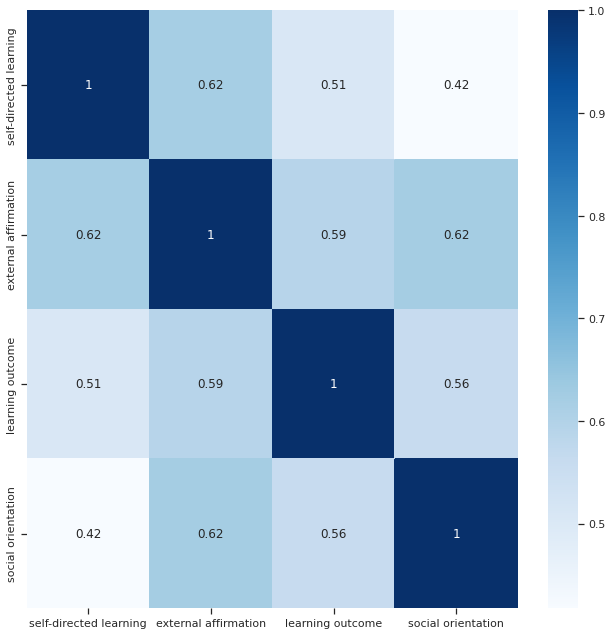

In [ ]:
plt.rcParams['figure.figsize']=(11,11)
sns.set(style='ticks',color_codes=True)
pairlist=['self-directed learning','external affirmation','learning outcome','social orientation']
sns.heatmap(data[pairlist].corr(),annot=True,cmap='Blues')

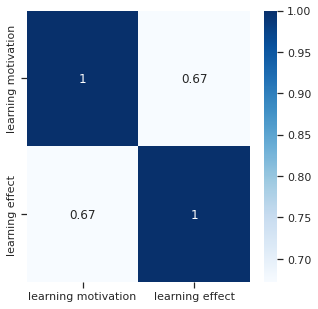

In [ ]:
plt.rcParams['figure.figsize']=(5,5)
sns.set(style='ticks',color_codes=True)
pairlist=['learning motivation','learning effect']
sns.heatmap(data[pairlist].corr(),annot=True,cmap='Blues')